In [505]:
#导入相关包
import micropip
await micropip.install('seaborn')
await micropip.install('pandas')
import warnings#作用：忽略代码运行时的警告信息（如数据类型警告、弃用警告）。
warnings.filterwarnings('ignore')
import numpy as np #快速处理数据计算
import pandas as pd #数据分析 
import seaborn as sns #绘图库
#设置sns样式设置 绘图风格
sns.set(style='whitegrid',context='notebook',palette='muted')
import matplotlib.pyplot as plt
#导入数据
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
display(train.head())  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [506]:
#分别查看实验数据集合预测数据集
print('训练数据大小：',train.shape)
print('预测数据大小：',test.shape)

训练数据大小： (891, 12)
预测数据大小： (418, 11)


In [507]:
display(train.head(),test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [508]:
#将训练数据和预测数据合并
full = pd.concat([train, test], ignore_index=True)
full.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [509]:
#查看详情
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


<Axes: xlabel='Embarked', ylabel='Survived'>

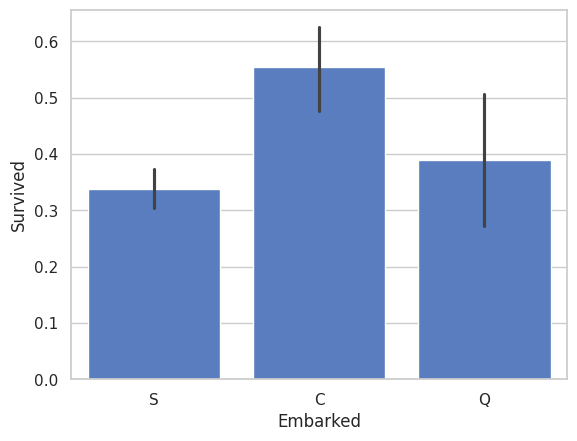

In [510]:
#3.1港口和生死之间的关系
sns.barplot(data=train,x='Embarked',y='Survived')

In [511]:
#计算不同类型的Embarked的乘客，其生存率是多少 0代表死亡，1代表生存
s = full.groupby('Embarked')['Survived'].value_counts().to_frame()
display(s)
s2 = s / s.groupby(level=0).sum()
pd.merge(s,s2,left_index=True,right_index=True,suffixes=['_num','_rate'])

count
Embarked Survived       
C        1.0          93
         0.0          75
Q        0.0          47
         1.0          30
S        0.0         427
         1.0         217

count_num  count_rate
Embarked Survived                       
C        1.0              93    0.553571
         0.0              75    0.446429
Q        0.0              47    0.610390
         1.0              30    0.389610
S        0.0             427    0.663043
         1.0             217    0.336957

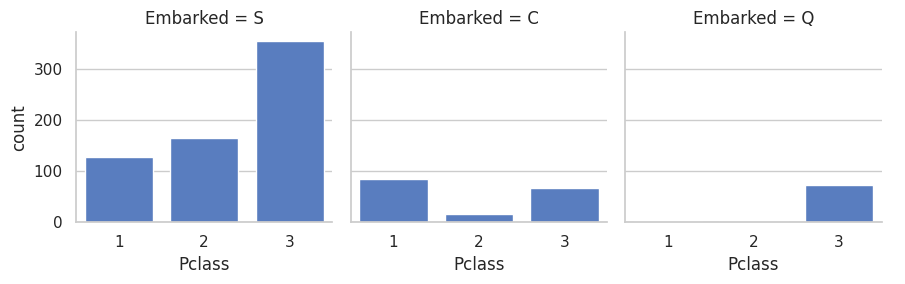

In [512]:
#从以上数据分析，法国登船乘客生存率较高，原因可能与其头等舱乘客比例较高有关
#因此继续分析不同登船地点乘客各舱位乘客数量情况
sns.catplot(x='Pclass',col='Embarked',data=train,kind='count',height=3,aspect=1)

<Axes: xlabel='Parch', ylabel='Survived'>

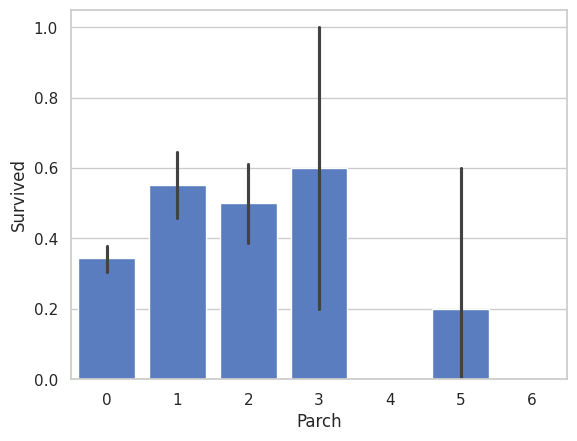

In [513]:
#Parch和Survived的关系 家长和孩子的关系
sns.barplot(data=train,x='Parch',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

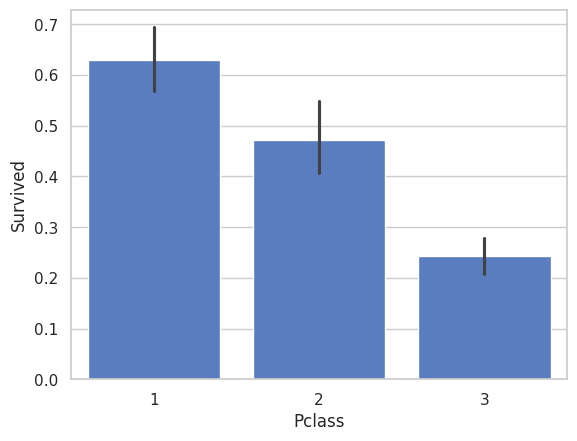

In [514]:
#等级和生存率的关系
sns.barplot(data=train,x='Pclass',y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

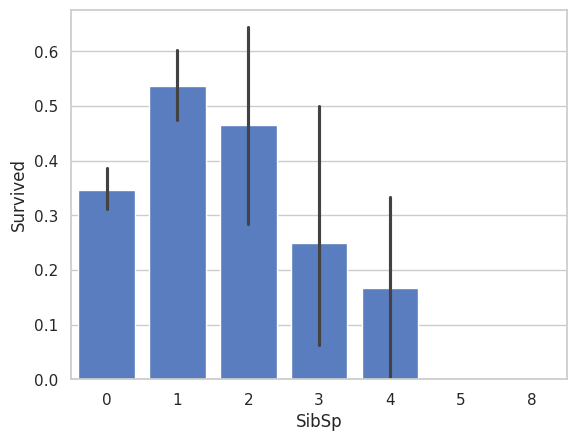

In [515]:
#兄弟姐妹和生存率的关系
sns.barplot(data=train,x='SibSp',y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

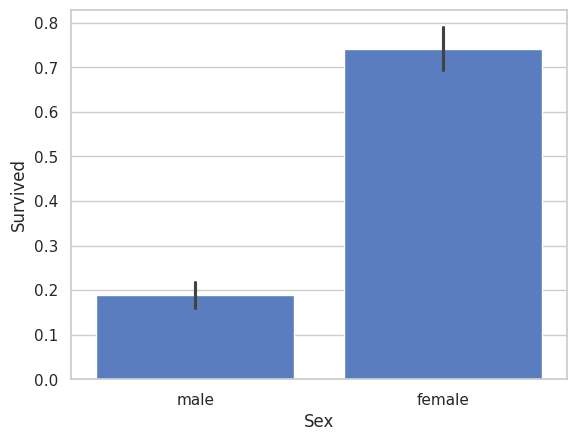

In [516]:
#性别和生存率的关系
sns.barplot(data=train,x='Sex',y='Survived')

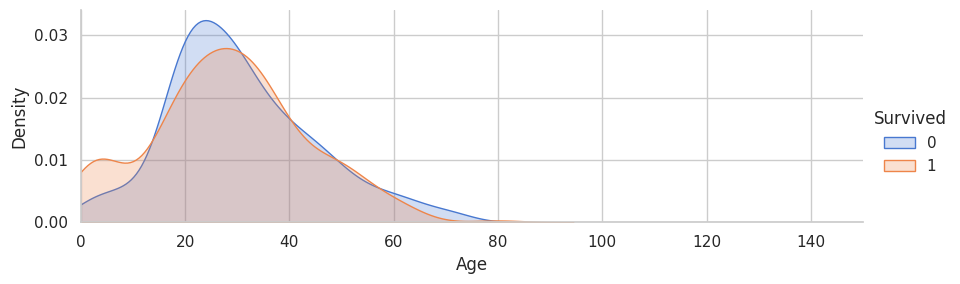

In [517]:
#年龄与生存率的关系
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

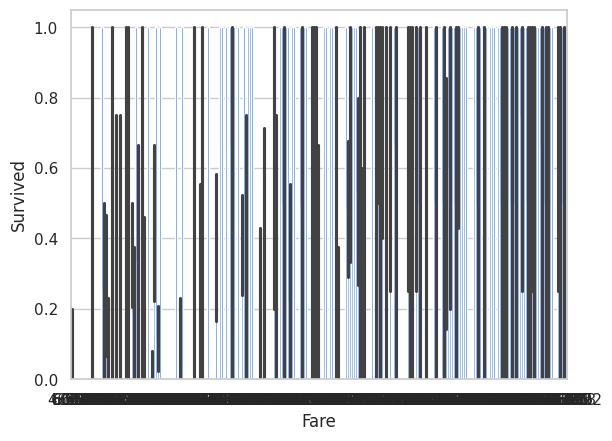

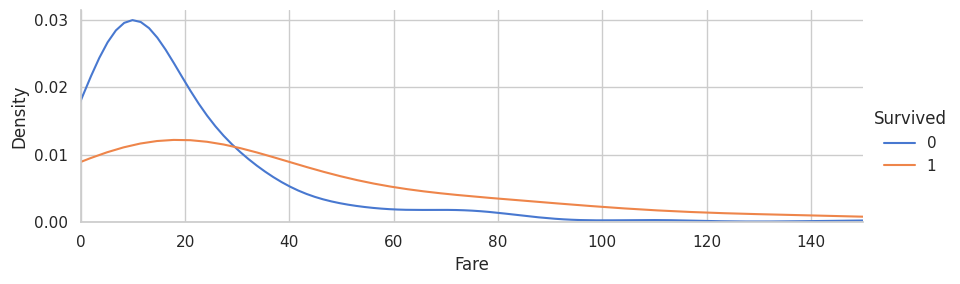

In [518]:
#消费和生存率之间的关系
sns.barplot(data=train,x='Fare',y='Survived')

ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)#aspect每个图片的纵横比
ageFacet.map(sns.kdeplot,'Fare',shade=False)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

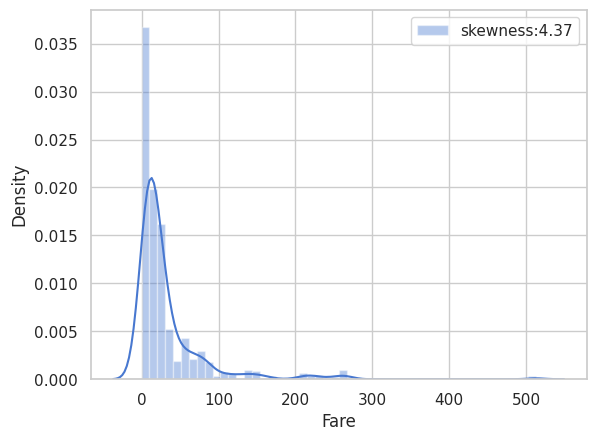

In [519]:
#查看票价的分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],
label='skewness:%.2f'%(full['Fare'].skew())) 
farePlot.legend(loc='best')

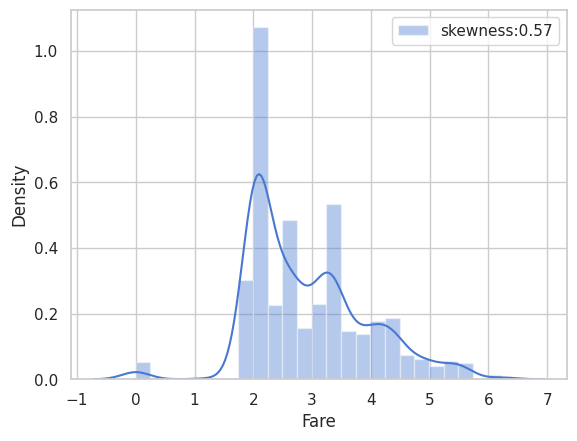

In [520]:
#对数处理fare值
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else x)

#处理后票价分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],
                     label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')
plt.savefig('./10-Fare票价分布.png',dpi=200)

###五、数据预处理，将不符合要求的数据处理
###数据清洗

In [521]:
#5.1.对Cabin缺失值填充
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [522]:
#5.2.对Embarked缺失值进行处理，查看缺失值情况
display(full[full['Embarked'].isnull()])

display(full['Embarked'].value_counts())
#查看Embarked数据分布情况，可知在英国南安普顿登船可能性最大
#故而对缺失值填充到英国港口
full['Embarked']=full['Embarked'].fillna('s')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

###对Fare缺失值填充

In [523]:
#查看确实数值情况，该乘客做三等舱，登船口为法国，舱位未知
display(full[full['Fare'].isnull()])

#利用三等舱，登船港口为英国，仓位位置旅客的平均票价来填充缺失值
price=full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean()
full['Fare']=full['Fare'].fillna(price)
full.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


In [524]:
#六.特征工程：在理解原有数据特征的基础上，特征工程通过对原有数据进行整合处理，得到的新数据，以此反应更多信息

In [525]:
#4.2.1、Name中的头衔信息-Title
#构造新特征Title
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip( ))
#查看title数据分布
full['Title'].value_counts()
#将相近的title整合在一起
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)

full['Title'].value_counts()

Title
Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

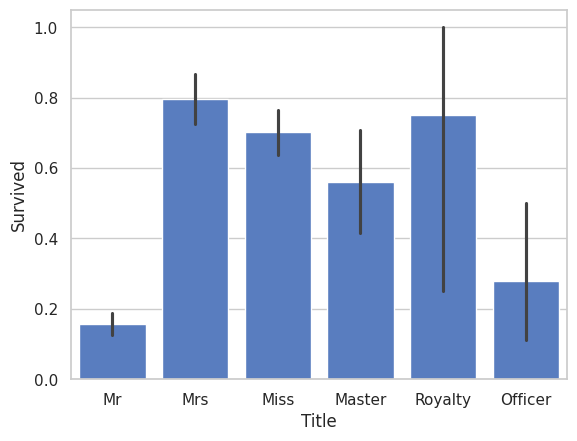

In [526]:
#可视化分析Title与SSurvived之间的关系
sns.barplot(data=full,x='Title',y='Survived')

<Axes: xlabel='familyNum', ylabel='Survived'>

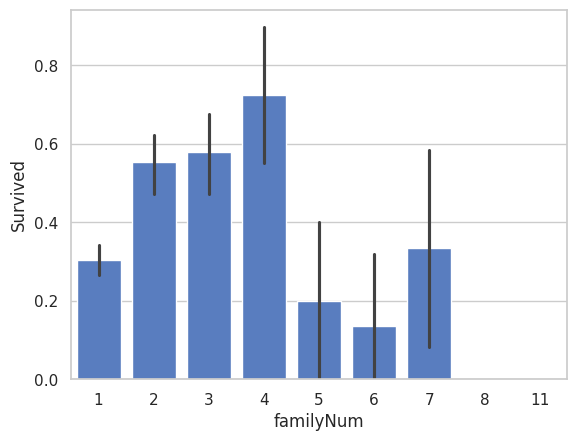

In [527]:
#家庭成员数量分析
full['familyNum']=full['Parch']+full['SibSp']+1
#查看familyNum和Survived
sns.barplot(data=full,x='familyNum',y='Survived')


In [528]:
#按照家庭成员人数多少，将家庭规模分为小（0），中（1），大（2）三类：
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif 2 <= familyNum <= 4:
        return 1
    else:
        return 2
full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

familySize
0    790
1    437
2     82
Name: count, dtype: int64

<Axes: xlabel='familySize', ylabel='Survived'>

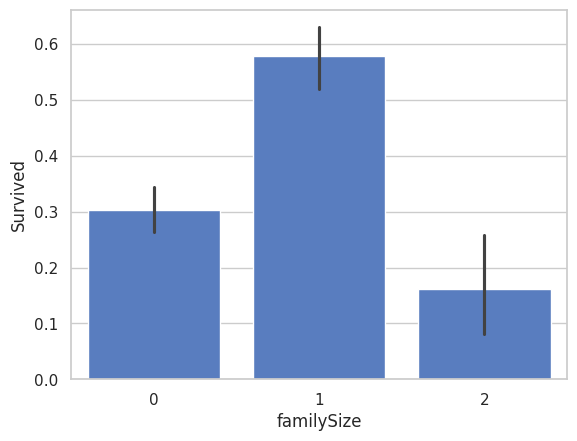

In [529]:
#查看familySize与Survived的关系
sns.barplot(data=full,x='familySize',y='Survived')

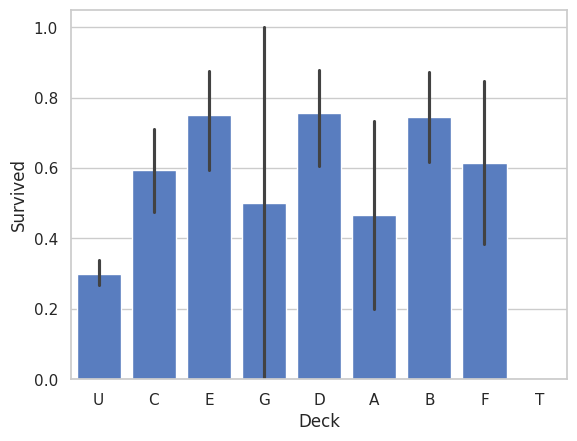

In [530]:
#船舱的类型
#提取Cabin字段首字母
full['Deck']=full['Cabin'].map(lambda x:x[0])
#查看不同Deck类型乘客的生存率
sns.barplot(data=full,x='Deck',y='Survived')
plt.savefig('./14=Deck与Survived关系.png',dpi=200)

In [531]:
###共号票乘客数量TickCom及TickGroup
#提取各票号的乘客数量
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head(20)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
347077           7
347082           7
3101295          7
19950            6
113781           6
347088           6
382652           6
4133             5
W./C. 6608       5
PC 17757         5
349909           5
220845           5
113503           5
16966            5
LINE             4
Name: count, dtype: int64

<Axes: xlabel='TickCom', ylabel='Survived'>

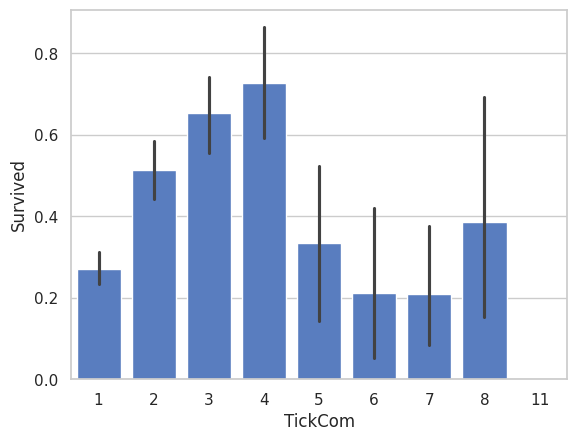

In [532]:
#将同号票乘客数量数据并入数据集中
full['TickCom']=full['Ticket'].map(TickCountDict)
full['TickCom'].head()
#查看TickCom与Survied之间的关系
sns.barplot(data=full,x='TickCom',y='Survived')

In [533]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCom
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,0,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,0,U,1


<Axes: xlabel='TickGroup', ylabel='Survived'>

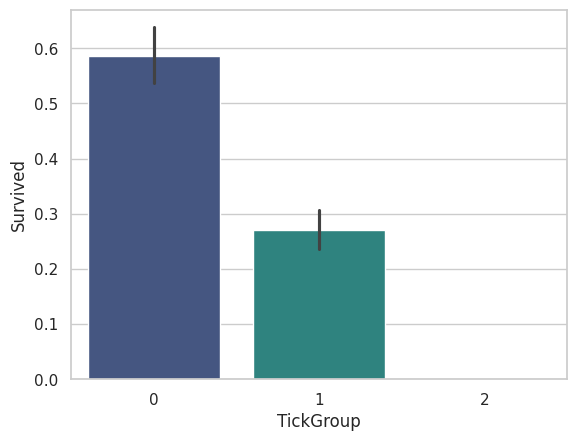

In [534]:
#按照TickCom大小，将TickGroup分为三类
def TickCountGroup(num):
    if 2 <= num <= 4:
        return 0
    elif num == 1 or 5 <= num <=8:
        return 1
    else:
        return 2
#得到各乘客TickGroup的类别
full['TickGroup']=full['TickCom'].map(TickCountGroup)
#查看TickGroup与Survived之间的关系
sns.barplot(data=full,x='TickGroup',y='Survived', palette='viridis')

###填充Age年龄

In [535]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [536]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
full[numeric_cols] = full[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 计算 Age 非空时的相关系数矩阵
corr_matrix = full[full['Age'].notnull()].corr(numeric_only=True)

# 输出结果
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.029340 -0.064097  0.028814 -0.050700 -0.021096   
Survived        0.029340  1.000000 -0.359653 -0.077221 -0.017358  0.093317   
Pclass         -0.064097 -0.359653  1.000000 -0.408106  0.047221  0.017224   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.050700 -0.017358  0.047221 -0.243699  1.000000  0.374456   
Parch          -0.021096  0.093317  0.017224 -0.150917  0.374456  1.000000   
Fare            0.038722  0.342920 -0.741394  0.194038  0.294004  0.318137   
familyNum      -0.044024  0.042787  0.039602 -0.240229  0.844260  0.813080   
familySize     -0.048093  0.106359 -0.074864 -0.174901  0.779310  0.705738   
TickCom        -0.013838  0.093239 -0.114293 -0.185284  0.621362  0.641500   
TickGroup      -0.005325 -0.322862  0.311226 -0.005224 -0.131130 -0.162860   

                 Fare  familyNum  familySize   TickCom  TickGro

In [537]:
#筛选数据集
agePre=full[['Age','Parch','Pclass','SibSp','familyNum','TickCom','Title']]
#进行one-hot编码
agePre=pd.get_dummies(agePre)
ageCorrDf=agePre.corr()
ageCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCom         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [538]:
agePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,3,1,2,1,False,False,True,False,False,False
1,38.0,0,1,1,2,2,False,False,False,True,False,False
2,26.0,0,3,0,1,1,False,True,False,False,False,False
3,35.0,0,1,1,2,2,False,False,False,True,False,False
4,35.0,0,3,0,1,1,False,False,True,False,False,False


In [539]:
##拆分数据并建立模型（利用随机森林构建模型
#拆分实验集和预测集
ageKnown=agePre[agePre['Age'].notnull()]#根据非空数据规律
ageUnKnown=agePre[agePre['Age'].isnull()]#空数据，填充

#生成实验数据的特征和标签
ageKnown_X=ageKnown.drop(['Age'],axis=1)
ageKnown_y=ageKnown['Age']

#生成预测数据的特征
ageUnKnown_X=ageUnKnown.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=41,n_estimators=500,n_jobs=-1)
rfr.fit(ageKnown_X,ageKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=41)

In [540]:
#模型得分
score=rfr.score(ageKnown_X,ageKnown_y)
print('模型预测年龄得分是：',score)
#预测年龄
ageUnKnown_predict=rfr.predict(ageUnKnown_X)
#填充预测数据
full.loc[full['Age'].isnull(),['Age']]=ageUnKnown_predict
full.info() #此时已无缺失值

模型预测年龄得分是： 0.5868562540828732
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int

###同组识别

In [541]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCom,TickGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,0,U,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,0,U,1,1


In [542]:
#提取乘客姓氏以及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['Surname'].value_counts()
display(SurNameDict)

full['SurnameNum']=full['Surname'].map(SurNameDict)

#12岁以上男性，找出中国男性姓氏均获救的部分
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]

#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

Surname
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: count, Length: 875, dtype: int64

Survived
0.0    89
1.0    19
0.5     3
Name: count, dtype: int64

In [543]:
#女性以及儿童同组效应分析
#提取乘客姓氏以及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

#将数据分为两组
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

Survived
1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: count, dtype: int64

##修改数据，提升其预测“存活”的概率
#即，存活下来的，但是不符合预测方向的数据，将其修改成“易存活”人群
#而已经死亡的人群，其中不符合预测方向的数据，将其修改成“易死亡”人群

In [544]:
#获取生存率为1的姓氏
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict
#获取生存率为0的姓氏
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict
#对数据集里（存活率高）这些姓氏的男性数据修饰：1.性别改为女，2.年龄改为5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&
(full['Sex']=='male'),'Sex']="female"
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&
(full['Sex']=='male'),'Age']=5

#对数据集里（死亡存活率低）这些姓氏的女性及儿童数据修饰：1.性别改为男，2.年龄改为60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&
((full['Sex']=='female')|(full['Age']<=12)),'Sex']="male"
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&
((full['Sex']=='female')|(full['Age']<=12)),'Age']=60

In [545]:
###条件筛选
#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)

#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

<class 'ValueError'>: could not convert string to float: 'male'

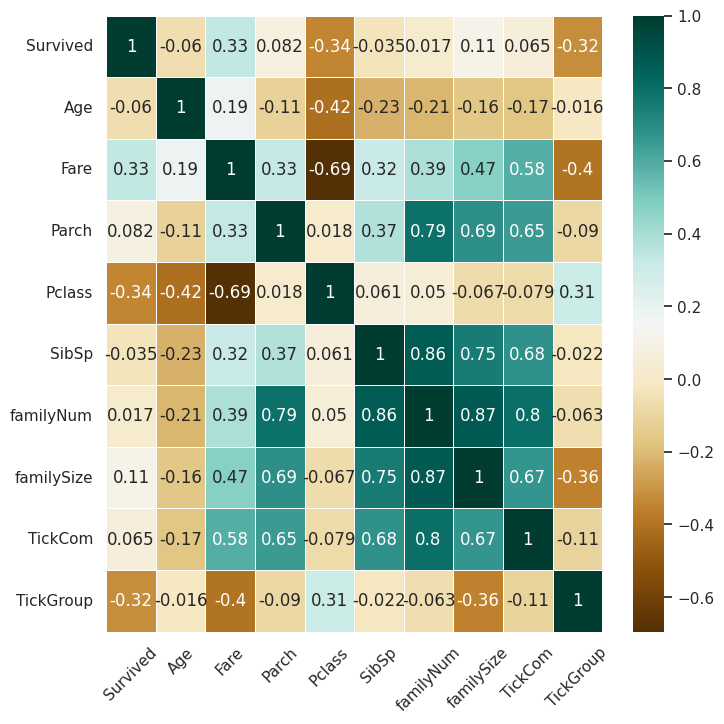

In [546]:
#使用热力图，查看Survive与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Fare','Parch','Pclass',
                     'SibSp','familyNum','familySize',
                     'TickCom','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
_=plt.xticks(rotation=45)

In [547]:
#删除相关系数性弱的属性
fullSel=fullSel.drop(['Age','Parch','SibSp','familyNum','TickCom'],axis=1)

#one-hot编码
fullSel=pd.get_dummies(fullSel)
fullSel.head()

,Survived,Pclass,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,1.981001,1,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,4.266662,1,0,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,2.070022,0,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,3.972177,1,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,2.085672,0,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


###3.算法建模
##3.1模型选择

In [548]:
#拆分实验数据与预测数据
experData=fullSel[fullSel['Survived'].notnull()]#已有数据（含标签）
preData=fullSel[fullSel['Survived'].isnull()]#预测数据（无标签）

#特征工程（处理费数值型数据）
experData_X=experData.drop('Survived',axis=1) #训练特征
experData_y=experData['Survived']#训练标签
preData_X=preData.drop('Survived',axis=1)#空数据，预测特征

#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10) 

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(XGBClassifier())
classifiers.append(LinearDiscriminantAnalysis())



print(f"实际使用的分类器数量：{len(classifiers)}") 

实际使用的分类器数量：9


In [549]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                     scoring='accuracy',cv=kfold,n_jobs=-1))
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())#求平均值
    cv_std.append(cv_result.std())#求标准差

#汇总数据
cvResDf=pd.DataFrame({
    'cv_mean':cv_means,              
    'cv_std':cv_std,
    'algorithm':[
        'SVC',
        'DecisionTreeCla',
        'RandomForestCla',
        'ExtraTreeCla',
        'GradientBoostingCla',
        'KNN',
        'LR',
        'LDA','Xgboost']})
cvResDf

,cv_mean,cv_std,algorithm
0,0.835019,0.035179,SVC
1,0.808090,0.029424,DecisionTreeCla
2,0.819326,0.030601,RandomForestCla
3,0.815968,0.029158,ExtraTreeCla
4,0.823858,0.041691,GradientBoostingCla
5,0.823795,0.039569,KNN
6,0.830549,0.038304,LR
7,0.829451,0.041136,LDA
8,0.828327,0.039658,Xgboost


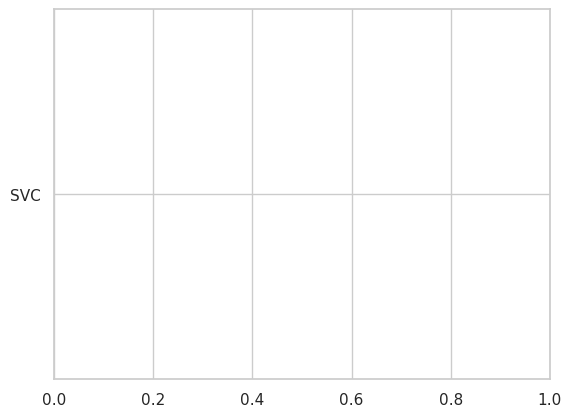

<class 'ValueError'>: 'xerr' (shape: (9,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (1,))

In [550]:
bar=sns.barplot(
    data=cvResDf.sort_values(by='cv_mean',ascending=False),#数据排序
    x='cv_mean',       #x轴数据
    y='algorithm',     #y轴分类
    **{'xerr':cv_std}) #误差线参数
bar.set(xlim=(0.7,0.9))#设置坐标轴范围

In [551]:
sorted_df['cv_std'].dtype

dtype('float64')

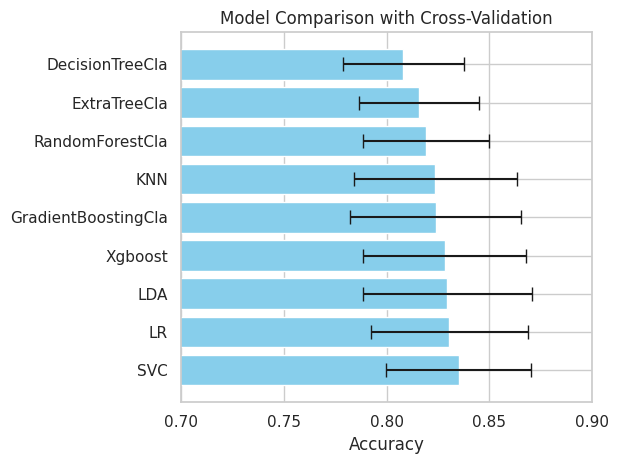

In [552]:
import matplotlib.pyplot as plt

# 排序数据
sorted_df = cvResDf.sort_values(by='cv_mean', ascending=False)

# 绘制水平条形图 + 误差线
plt.barh(
    y=sorted_df['algorithm'],   # y轴分类标签
    width=sorted_df['cv_mean'], # 条形长度（x轴数据）
    xerr=sorted_df['cv_std'],   # 横向误差线（关键修正点）
    capsize=5,                  # 误差线端盖长度
    color='skyblue'             # 条形颜色（可选）
)

# 设置x轴范围
plt.xlim(0.7, 0.9)
plt.xlabel('Accuracy')
plt.title('Model Comparison with Cross-Validation')
plt.tight_layout()
plt.show()

In [553]:
###模型调优3.2
#GradientBoostingClassifier模型
GBC=GradientBoostingClassifier()
gb_param_grid={'loss':["deviance"],
              'n_estimators':[100,200,300],
              'learning_rate':[0.1,0.05,0.01],
              'max_depth':[4,8],
              'min_samples_leaf':[20,50],
              'max_features':[0.3,0.1]}
modelgsGBC=GridSearchCV(GBC,param_grid=gb_param_grid,cv=kfold,
                      scoring="accuracy",n_jobs=-1,verbose=1)
modelgsGBC.fit(experData_X,experData_y)
modelgsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


<class 'ValueError'>: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'deviance' instead.


In [554]:
#GradientBoostingClassifier模型
#GradientBoostingClassifier模型from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 初始化交叉验证对象（确保 kfold 已定义）
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 定义简化参数网格
gb_param_grid = {
    'loss': ["log_loss"],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [4, 6],
    'min_samples_leaf': [10, 20],
    'max_features': [None, 'sqrt']  # 避免过小比例
}

# 初始化 GridSearchCV
modelgsGBC = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid=gb_param_grid,
    cv=kfold,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

# 训练模型
modelgsGBC.fit(experData_X, experData_y)

# 输出最佳参数
print("最佳参数:", modelgsGBC.best_params_)
print("最佳模型分数:", modelgsGBC.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
最佳参数: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 200}
最佳模型分数: 0.8428849413093967


In [555]:
#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid={'C':[1,2,3],
              'penalty':['l1','l2']}
modelgsLR=GridSearchCV(modelLR,param_grid=LR_param_grid,cv=kfold,
                      scoring="accuracy",n_jobs=-1,verbose=1)
modelgsLR.fit(experData_X,experData_y)
modelgsLR.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


np.float64(0.8271608813006089)

In [556]:
#SVC模型
svc=SVC()
gb_param_grid={'C':[0.1,0.5,1,2,3,5,10],
              'kernel':['rbf','poly','sigmoid']
              }
modelgsSVC=GridSearchCV(svc,param_grid=gb_param_grid,cv=kfold,
                      scoring="accuracy",n_jobs=-1,verbose=1)
modelgsSVC.fit(experData_X,experData_y)

#LDA模型
lda=LinearDiscriminantAnalysis()
gb_param_grid={'solver':['svd','lsqr','eigen'],
              'tol':[0.000001,0.00001,0.0001,0.001,0.01]
              }
modelgsLDA=GridSearchCV(lda,param_grid=gb_param_grid,cv=kfold,
                      scoring="accuracy",n_jobs=-1,verbose=1)
modelgsLDA.fit(experData_X,experData_y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             scoring='accuracy', verbose=1)

In [557]:
###5.2 查看模型ROC曲线

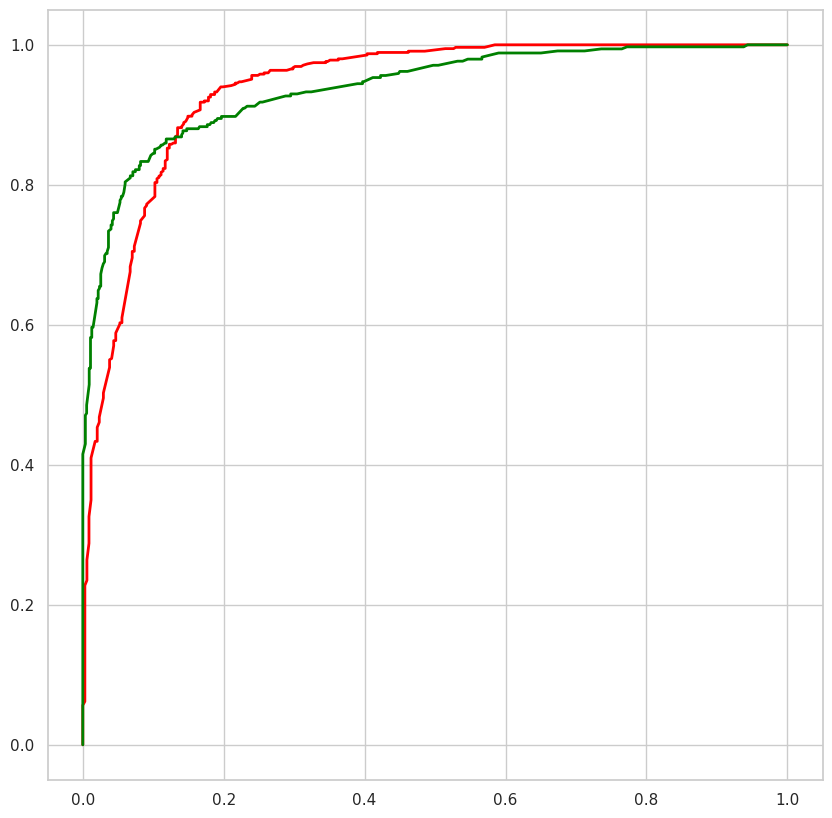

<class 'IndexError'>: index 2 is out of bounds for axis 1 with size 2

In [558]:
#模型ROC曲线
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# --- 核心修复点 ---
# 1. 获取多分类预测概率（而非硬标签）
y_score = modelgsGBC.predict_proba(experData_X)  # 形状：(n_samples, 3)

# 2. 二值化多分类标签（One-vs-Rest）
y_true_bin = label_binarize(experData_y, classes=[0, 1, 2])  # 形状：(n_samples, 3)

# 3. 为每个类别计算ROC曲线和AUC
plt.figure(figsize=(10, 10))
colors = ['red', 'green', 'blue']
for i in range(3):  # 三个类别
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc:.3f})')

# 4. 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Titanic)')
plt.legend(loc="lower right")
plt.show()

In [559]:
print("类别标签:", np.unique(experData_y))

类别标签: [0. 1.]


In [560]:
###5.23混淆矩阵
from sklearn.metrics import confusion_matrix
print('GradientBosstingClassifier模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsGBCtestpre_y))
print('LogisticRegression模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsLRtestpre_y))
print('SVC模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsSVCtestpre_y))


GradientBosstingClassifier模型混淆矩阵为
 [[510  39]
 [ 64 278]]
LogisticRegression模型混淆矩阵为
 [[483  66]
 [ 76 266]]
SVC模型混淆矩阵为
 [[496  53]
 [ 92 250]]


###5.3 混淆矩阵

In [563]:
###模型预测
y_ = modelgsGBC.predict(preData_X)
y_ = y_.astype(int)

#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=y_
GBCpreResultDf
#将预测结果导出为csv文件
GBCpreResultDf.to_csv('./lufengkun_titannic.csv',index=False)
display(GBCpreResultDf.head())

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [562]:
# 检查缺失值列及数量
print("缺失值统计:")
print(preData_X.isnull().sum())

缺失值统计:
Pclass           0
Fare             0
familySize       0
TickGroup        0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Embarked_s       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Deck_A           0
Deck_B           0
Deck_C           0
Deck_D           0
Deck_E           0
Deck_F           0
Deck_G           0
Deck_T           0
Deck_U           0
dtype: int64


In [564]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
